In [1]:
from utils_04_06 import *

C:\Users\ms\Desktop\lane-detection\python\utils_31_05.py:180: RuntimeWarning: invalid value encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))
C:\Users\ms\Desktop\lane-detection\python\utils_31_05.py:180: RuntimeWarning: divide by zero encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


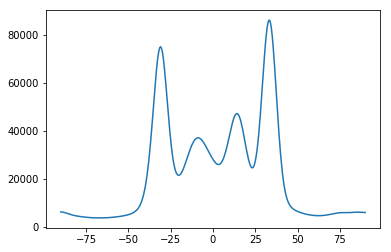

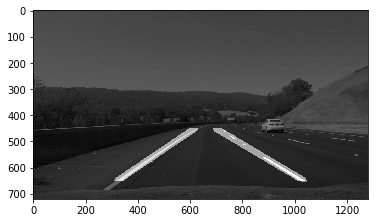

[-30.835654596100284, 33.844011142061277]


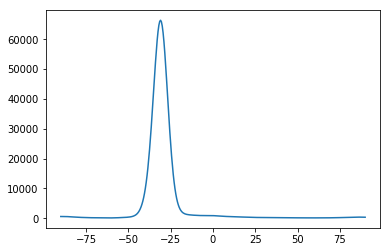

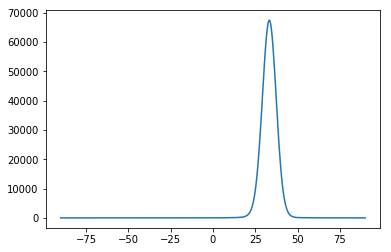

In [2]:
img_orig = mpimg.imread('img/test3.jpg')
img = img_orig[470:650,:]
#test = np.ones((100, 500))#img[470:650, 100:1200]
gray = rgb2gray(img_orig)
y, tan_arr, mag_arr = edf_comp(img)
edges, vm = get_edges_thetas(y, tan_arr, mag_arr)
gray_lines, lbrois = draw_on_img(gray, edges, vm, mag_arr, 470, 650, thicc=24)

gshow(gray_lines)
#print(len(edges))
print(vm)
aeim = get_new_angles_edges(img_orig, lbrois)

-31.0


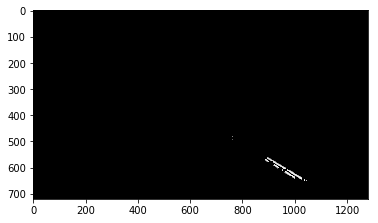

33.5


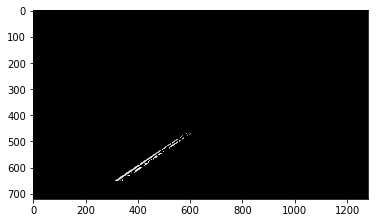

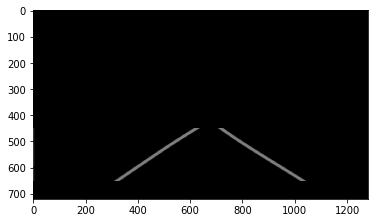

In [3]:
'''
    Get parabolas from edge images
    
    Parameters:
        
        aeim : list returned from get_new_angle_edges()
        
        lw : width of parabola
        
    Return:
    
        parabolas : list of parabola images

'''

for i in range(2):
    print(aeim[i][0])
    gshow(aeim[i][1])

'''def get_parabolas(aeim, lw=1):
    edges = []
    parabolas = []
    
    for i in range(len(aeim)):
        edges.append(aeim[i][1])
        
    for edge in edges:
        C = solver(edge)
        parabola = parabola_image(edge, C, lw=lw)
        parabolas.append(parabola)
    
    return parabolas
'''

ps = get_parabolas(aeim)
b = np.zeros_like(ps[0])
for p in ps:
    b[450:650, :] += p[450:650, :]
gshow(b)

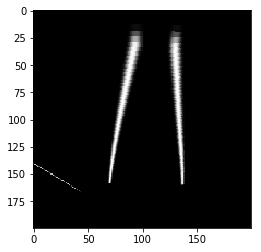

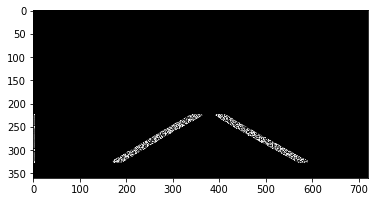

In [7]:
from skimage import color


'''
    Crop parabolas, draw them and apply ipm
    
    Parameters:
    
        parabolas : list of parabola images
        
        ymin : lower y crop value
        
        ymax : upper y crop value
        
    Return:
    
        rm : ipm image
        
        rs : resized original image (RGB IMAGE ALERT!!)

'''

'''def crop_ipm(parabolas, ymin, ymax):
    comp = np.zeros_like(parabolas[0])
    for ind in range(len(parabolas)):
        comp[ymin:ymax, :] += parabolas[ind][ymin:ymax, :]
    
    comp = color.gray2rgb(comp)
    
    comp = cv2.GaussianBlur(comp, (7,7), 3)
    rm, rs = ipm(comp)
    
    return (rm, rs)
'''
rm, rs = crop_ipm(ps, 450, 650, 10)
gshow(rm)
gshow(rs)

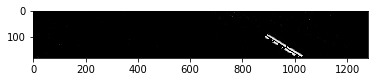

[[ 465.08665048]
 [   2.40842324]
 [   1.37456823]]
67.45131502896346


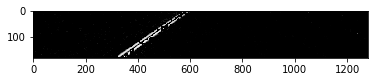

[[ 307.18948595]
 [  -0.59799885]
 [  -1.64480577]]
-30.879375022263492


In [5]:
for edge in edges:
    c = solver(edge)
    gshow(edge)
    print(c)
    b = c[1]
    deg = rad2deg(math.atan(b))
    print(deg)